In [95]:
from PIL import Image
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import *
import h5py

In [96]:
def load_data():
    train_dataset = h5py.File('/content/drive/My Drive/CatNonCat/Dataset/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/CatNonCat/Dataset/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [101]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [102]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [3]:

#file paths
#training data path
cat = '/content/drive/My Drive/CatNonCat/Dataset/cat/' #write complete path if file is not in same directory as that of this code
non_cat = '/content/drive/My Drive/CatNonCat/Dataset/notcat/'
resized_cat = '/content/drive/My Drive/CatNonCat/Dataset/resized/cat/'
resized_non_cat = '/content/drive/My Drive/CatNonCat/Dataset/resized/non_cat/'

#test data path
cat_test = '/content/drive/My Drive/CatNonCat/Dataset/cat_test/' 
non_cat_test = '/content/drive/My Drive/CatNonCat/Dataset/notcat_test/'
resized_cat_test = '/content/drive/My Drive/CatNonCat/Dataset/resized/cat_test/'
resized_non_cat_test = '/content/drive/My Drive/CatNonCat/Dataset/resized/nonCat_test/'

In [4]:
#traning data
list_cat = os.listdir(resized_cat)
list_non_cat = os.listdir(resized_non_cat)

#test data
list_cat_test = os.listdir(resized_cat_test)
list_non_cat_test = os.listdir(resized_non_cat_test)

In [5]:
m_cat = len(list_cat)
m_non_cat = len(list_non_cat)
m_cat_test = len(list_cat_test)
m_non_cat_test = len(list_non_cat_test)

In [6]:
print(m_cat)
print(m_non_cat)
print(m_cat_test)
print(m_non_cat_test)

544
400
186
200


In [7]:
train_cat = np.array([np.array(Image.open(resized_cat+i)).flatten() for i in list_cat], 'f')
test_cat = np.array([np.array(Image.open(resized_cat_test+i)).flatten() for i in list_cat_test], 'f')

In [8]:
print(train_cat.shape)
print(test_cat.shape)

train_cat = train_cat.T
test_cat = test_cat.T

print(train_cat.shape)
print(test_cat.shape)

(544, 120000)
(186, 120000)
(120000, 544)
(120000, 186)


In [9]:
train_non_cat = np.array([np.array(Image.open(resized_non_cat+i)).flatten() for i in list_non_cat], 'f')
test_non_cat = np.array([np.array(Image.open(resized_non_cat_test+i)).flatten() for i in list_non_cat_test], 'f')

In [10]:
print(train_non_cat.shape)
print(test_non_cat.shape)

train_non_cat = train_non_cat.T
test_non_cat = test_non_cat.T

print(train_non_cat.shape)
print(test_non_cat.shape)

(400, 120000)
(200, 120000)
(120000, 400)
(120000, 200)


In [11]:
final_train = np.concatenate((train_cat, train_non_cat), axis = 1)
final_test = np.concatenate((test_cat, test_non_cat), axis = 1)

In [12]:
print(final_train.shape)
print(final_test.shape)

(120000, 944)
(120000, 386)


In [13]:
#Labelling the dataset

m = final_train.shape[1]
m_test = final_test.shape[1]
Y = np.zeros((m, 1), dtype=int)
Y_test = np.zeros((m_test, 1),dtype=int)
Y[0:m_cat] = 1
Y_test[0:m_cat_test] = 1

In [14]:
Y.shape

(944, 1)

In [15]:
Y_test.shape

(386, 1)

In [16]:
final_train = final_train.T
final_test = final_test.T

print(final_train.shape)
print(final_test.shape)

(944, 120000)
(386, 120000)


In [17]:
#shuffle data
X_train,Y_train = shuffle(final_train,Y, random_state=0)
X_test,Y_test = shuffle(final_test,Y_test, random_state=0)

In [18]:
X_train = X_train.T
X_test = X_test.T

In [19]:
print(X_train.shape)
print(X_test.shape)

(120000, 944)
(120000, 386)


In [20]:
Y_train = Y_train.T
Y_test = Y_test.T

In [21]:
print(Y_train.shape)
print(Y_test.shape)

(1, 944)
(1, 386)


In [22]:
#standardize data
X_train = X_train/255   #255 is maximum possible value in image pixle 
X_test = X_test/255

In [23]:
def sigmoid(Z):
    A = 1/(1+ np.exp(-Z))
    cache = Z
    return A, cache

In [24]:
def relu(Z):

  A = np.maximum(0, Z)
  assert(A.shape == Z.shape)
  cache = Z 
  return A, cache

In [119]:
def initialize_parameters_deep(layer_dims):
  
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])/ np.sqrt(layer_dims[l-1])
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
  return parameters

In [26]:
def linear_forward(A, W, b):

  Z = np.dot(W, A) + b

  assert(Z.shape == (W.shape[0], A.shape[1]))
  cache = (A, W, b)

  return Z, cache

In [27]:
def linear_activation_forward(A_prev, W, b, activation):

  if activation == "sigmoid":
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z)
  elif activation == "relu":
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = relu(Z)

  assert(A.shape == (W.shape[0], A_prev.shape[1]))
  cache = (linear_cache, activation_cache)
  return A, cache

In [28]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
      A_prev = A
      A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation="relu")
      caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [29]:
def compute_cost(AL, Y):
  m = Y.shape[1]

  cost = (-1/m) * np.sum(np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    
  cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
  assert(cost.shape == ())
    
  return cost

In [30]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims= True)
    dA_prev = np.dot(W.T, dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [31]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [32]:
def linear_activation_backward(dA, cache, activation):

  linear_cache, activation_cache = cache

  if activation == "relu":
    dZ = relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

  elif activation == "sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
  return dA_prev, dW, db

In [33]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[-1]

    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

    for l in reversed(range(L-1)):

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu")

        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [34]:

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - grads["dW" + str(l+1)] * learning_rate
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - grads["db" + str(l+1)] * learning_rate
    ### END CODE HERE ###
    return parameters

In [115]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        AL, caches =  L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters =  update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [41]:
def predict(X, y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [125]:
layers_dims = [X_train.shape[0], 50, 50, 50, 1] 

Cost after iteration 0: 0.707414
Cost after iteration 100: 0.621154
Cost after iteration 200: 0.623740
Cost after iteration 300: 0.697894
Cost after iteration 400: 0.542038
Cost after iteration 500: 0.390682
Cost after iteration 600: 0.338009
Cost after iteration 700: 0.514701
Cost after iteration 800: 0.404814
Cost after iteration 900: 0.365033
Cost after iteration 1000: 0.393057
Cost after iteration 1100: 0.352033
Cost after iteration 1200: 0.242664
Cost after iteration 1300: 0.339936
Cost after iteration 1400: 0.224938
Cost after iteration 1500: 0.571658
Cost after iteration 1600: 0.244506
Cost after iteration 1700: 0.435261
Cost after iteration 1800: 0.380585
Cost after iteration 1900: 0.109174
Cost after iteration 2000: 0.107925
Cost after iteration 2100: 0.085756
Cost after iteration 2200: 0.260621
Cost after iteration 2300: 0.152581
Cost after iteration 2400: 0.142917


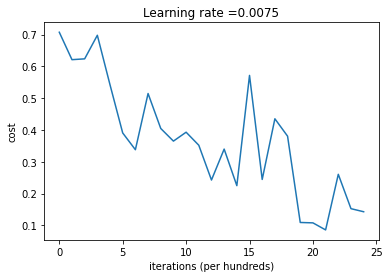

In [126]:
parameters = L_layer_model(X_train, Y_train, layers_dims,learning_rate= 0.0075, num_iterations = 2500, print_cost = True)

In [127]:
pred_train = predict(X_train, Y_train, parameters)

Accuracy: 0.9894067796610171


In [128]:
pred_test = predict(X_test, Y_test, parameters)

Accuracy: 0.8678756476683938


In [120]:
layers_dims = [12288, 20, 7, 5, 1] 

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


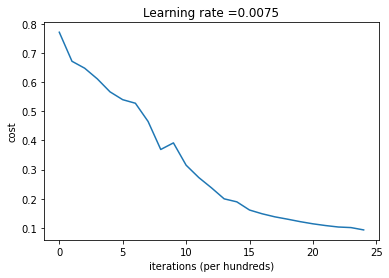

In [121]:
parameters1 = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [122]:
pred_train = predict(train_x, train_y, parameters1)

Accuracy: 0.9856459330143539


In [123]:
pred_test = predict(test_x, test_y, parameters1)

Accuracy: 0.8


(120000, 1)
Accuracy: 1.0
This is a cat picture
[[1.]]


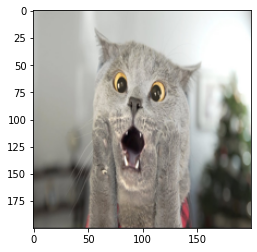

In [142]:
#my_image = "/content/drive/My Drive/CatNonCat/my_cat.jpg"   
#my_image = "/content/drive/My Drive/CatNonCat/Dataset/notcat/00000005.jpg"
my_image = "/content/drive/My Drive/CatNonCat/Dataset/cat/00000013.jpg"
image = Image.open(my_image)
im1 = image.resize((200,200))
im2 = im1.convert('RGB')
image = np.array([np.array(im2).flatten()], 'f')
image = image.T
print(image.shape)
image = image/255
my_label_y = [1]
my_predicted_image = predict(image, my_label_y, parameters)

plt.imshow(im1)

if(my_predicted_image[0][0] == 1):
  print("This is a cat picture")
else:
  print("this is not cat a picture")
print(my_predicted_image)
#print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")